In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Part 1: Introduction/Exploratory Data Analysis

In [5]:
df = pd.read_csv('C:\MLF_GP1_CreditScore.csv')

#count the number of data in different categories in each column
df = np.array(df)
df= df.tolist()
nrow = len(df)
ncol = len(df[1])
type = [0]*3
colCounts = []
for col in range(ncol):
    for row in df:
        try:
            a = float(row[col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(row[col]) > 0:
                type[1] += 1
            else:
                type[2] += 1
    colCounts.append(type)
    type = [0]*3
sys.stdout.write("Col#" + '\t\t' + "Number" + '\t\t' + "Strings" + '\t\t ' + "Other\n")
iCol = 0
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t\t' + str(types[0]) + '\t\t' +
                     str(types[1]) + '\t\t' + str(types[2]) + "\n")
    iCol += 1

In [6]:
df = pd.read_csv('C:\MLF_GP1_CreditScore.csv')
summary = df.describe()
print(summary)

       Sales/Revenues  Gross Margin       EBITDA  EBITDA Margin  \
count     1700.000000   1700.000000  1700.000000    1700.000000   
mean         0.050378      0.026007     0.068718       0.021074   
std          0.161910      0.273768     0.237365       0.189025   
min         -0.661715     -0.794722    -0.782254      -0.805153   
25%         -0.005693     -0.020028    -0.022640      -0.042771   
50%          0.034000      0.003403     0.049482       0.011134   
75%          0.083004      0.025595     0.124533       0.060566   
max          2.277229      3.202713     3.542425       4.141182   

       Net Income Before Extras   Total Debt     Net Debt      LT Debt  \
count               1700.000000  1700.000000  1700.000000  1700.000000   
mean                   0.123026     0.822405    -0.419810     1.255168   
std                   14.475689    13.317075    28.385702    16.224453   
min                 -289.000000    -0.903014  -493.305578    -0.921515   
25%                   -0.1

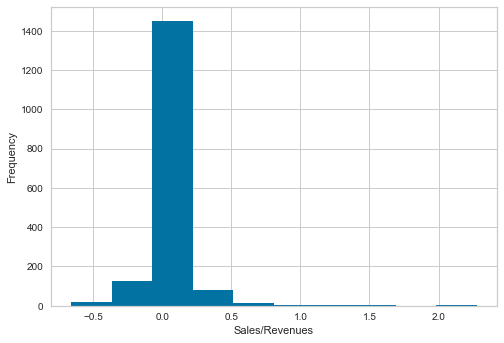

In [27]:
plt.hist(df['Sales/Revenues'],bins=10)
plt.xlabel('Sales/Revenues')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

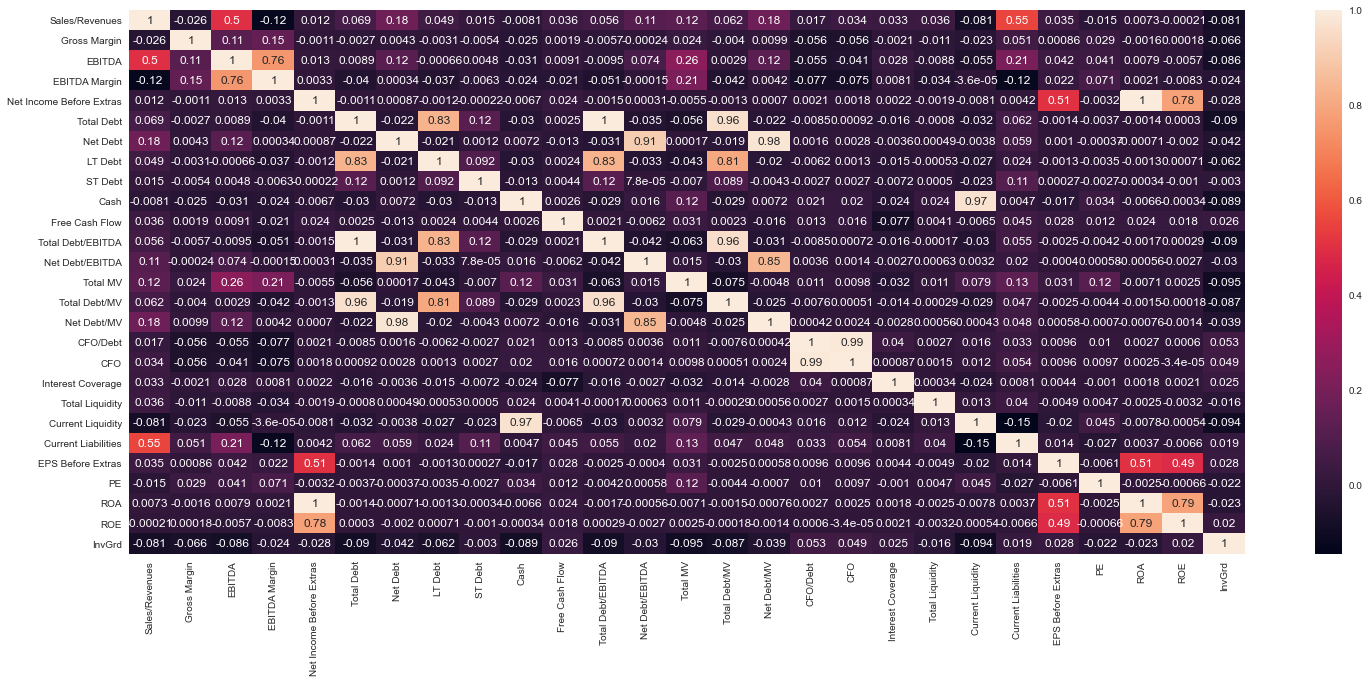

In [8]:
plt.figure(figsize=(25,10))
corMat = DataFrame(df.corr())
sns.heatmap(corMat,annot=True)

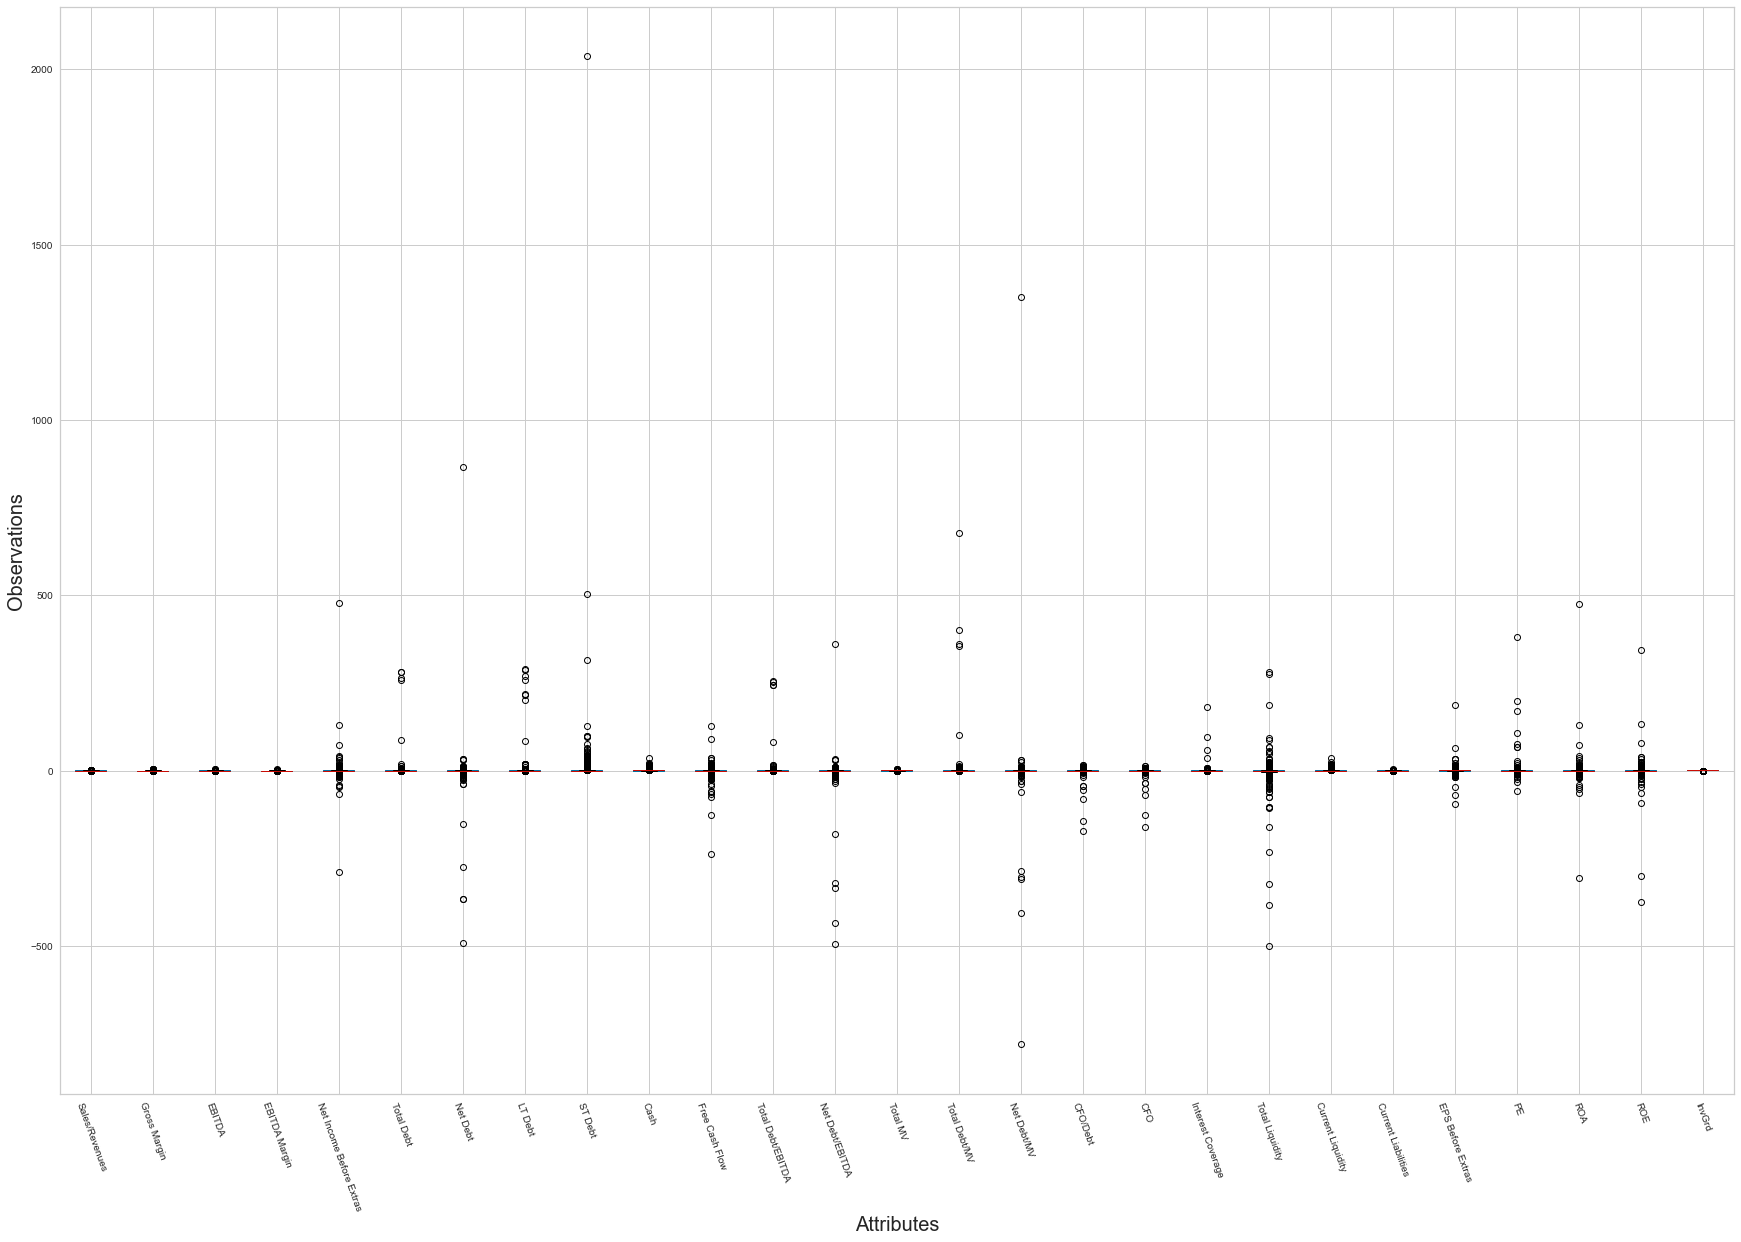

In [9]:
data=df.iloc[:,:]
data.boxplot(figsize=(30,20))
plt.xticks(rotation=290)
plt.xlabel('Attributes',fontsize=20)
plt.ylabel('Observations',fontsize=20)
plt.show()

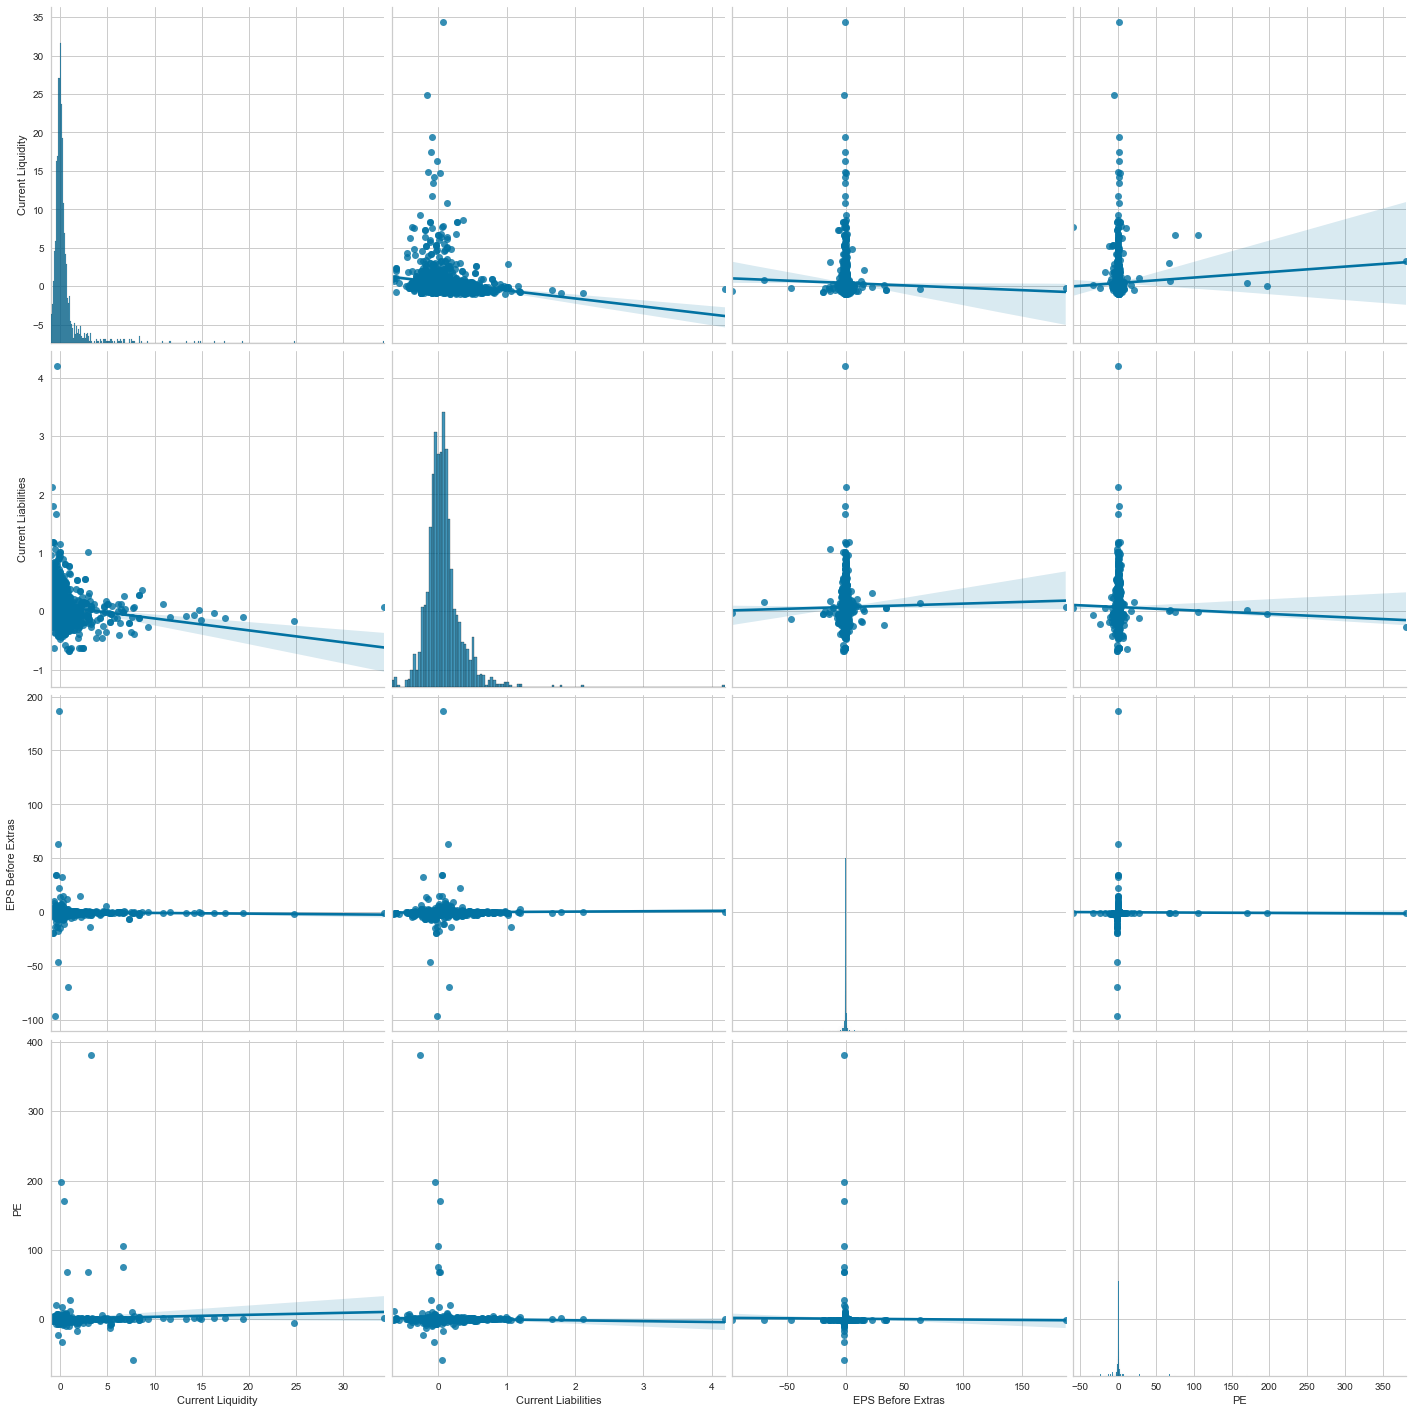

In [10]:
sns.pairplot(df.iloc[:,20:24], height=5,kind='reg',diag_kind='hist')
plt.show()

In [11]:
df = np.array(df)
df= df.tolist()
col = 27
colData = []
for row in df:
 colData.append(row[col])
unique = set(colData)
sys.stdout.write("Unique Label Values \n")
print(unique)


Unique Label Values 
{'A3', 'Aa2', 'A2', 'Baa1', 'B2', 'Baa2', 'Caa1', 'B1', 'Baa3', 'Ba2', 'Ba1', 'Aaa', 'Aa3', 'Ba3', 'B3', 'A1'}


In [12]:
catDict = dict(zip(list(unique),range(len(unique))))
catCount = [0]*16
for elt in colData:
 catCount[catDict[elt]] += 1
sys.stdout.write("\nCounts for Each Value of Categorical Label \n")
print(list(unique))
print(catCount)


Counts for Each Value of Categorical Label 
['A3', 'Aa2', 'A2', 'Baa1', 'B2', 'Baa2', 'Caa1', 'B1', 'Baa3', 'Ba2', 'Ba1', 'Aaa', 'Aa3', 'Ba3', 'B3', 'A1']
[31, 65, 156, 179, 48, 326, 9, 69, 232, 125, 17, 2, 174, 108, 37, 122]


In [14]:
df = pd.read_csv('C:\MLF_GP1_CreditScore.csv')
X = df.iloc[:, 0:-2].values
y = df[['Rating']].values
le = preprocessing.LabelEncoder()
le.fit(['Baa2', 'Ba3', 'Baa1', 'A2', 'Ba2', 'Caa1', 'Aa2', 'B2', 'B3', 'Aaa', 'A1', 'A3', 'Aa3', 'B1', 'Baa3', 'Ba1'] )
le.transform(df[['Rating']])
y=le.transform(df[['Rating']])

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Part 2: Preprocessing, feature extraction, feature selection

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.207143831103167, tolerance: 2.6954882352941185
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.582703594260238, tolerance: 2.6954882352941185
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7172449820573092, tolerance: 2.6954882352941185
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-pa

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.82781100458305, tolerance: 2.6954882352941185
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.82170167710865, tolerance: 2.6954882352941185
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.81498873905366, tolerance: 2.6954882352941185
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-pac

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.5204651718559, tolerance: 2.6954882352941185
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.51947961083351, tolerance: 2.6954882352941185
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.51852452311505, tolerance: 2.6954882352941185
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-pack

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.69745914232044, tolerance: 2.6605925551470597
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.713270876109164, tolerance: 2.6605925551470597
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.6330931459961, tolerance: 2.6605925551470597
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-pac

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.56603339909634, tolerance: 2.6605925551470597
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.56129678254365, tolerance: 2.6605925551470597
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.55666656336325, tolerance: 2.6605925551470597
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-pac

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.387090097279724, tolerance: 2.6605925551470597
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.38658509773086, tolerance: 2.6605925551470597
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.38609478823855, tolerance: 2.6605925551470597
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-pa

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.499405846909212, tolerance: 2.6744866727941177
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.12881225009187, tolerance: 2.6744866727941177
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.613282213700586, tolerance: 2.6744866727941177
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-pa

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.85453091163436, tolerance: 2.6744866727941177
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.84892937302357, tolerance: 2.6744866727941177
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.84345546024997, tolerance: 2.6744866727941177
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.63999765203698, tolerance: 2.6744866727941177
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.63951413569885, tolerance: 2.6744866727941177
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.63905215429622, tolerance: 2.6744866727941177
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.77407748367477, tolerance: 2.7033366727941175
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.97419365630412, tolerance: 2.7033366727941175
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.31520628929138, tolerance: 2.7033366727941175
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-p

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204.15040740731638, tolerance: 2.7033366727941175
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204.14563720871956, tolerance: 2.7033366727941175
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204.1409811560552, tolerance: 2.7033366727941175
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-p

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.97419989356058, tolerance: 2.7033366727941175
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.97374120204768, tolerance: 2.7033366727941175
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.9732742021297, tolerance: 2.7033366727941175
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-p

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.868931327906466, tolerance: 2.7283227022058822
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.840841692817776, tolerance: 2.7283227022058822
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.81228961279339, tolerance: 2.7283227022058822
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-p

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.12824906188689, tolerance: 2.7283227022058822
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.122474139941914, tolerance: 2.7283227022058822
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.11683518797872, tolerance: 2.7283227022058822
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-pa

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.914923253298184, tolerance: 2.7283227022058822
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.914335374145594, tolerance: 2.7283227022058822
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.91376003503683, tolerance: 2.7283227022058822
  tol, rng, random, positive)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-p

Sales/Revenues              0.000000
Gross Margin                0.163017
EBITDA                     -0.205398
EBITDA Margin               0.000000
Net Income Before Extras    0.000000
Total Debt                  0.000000
Net Debt                    0.000000
LT Debt                    -0.271052
ST Debt                     0.097503
Cash                        0.000000
Free Cash Flow              0.000000
Total Debt/EBITDA           0.039669
Net Debt/EBITDA            -0.000000
Total MV                    0.173068
Total Debt/MV               0.134049
Net Debt/MV                 0.000000
CFO/Debt                    0.000000
CFO                        -0.000000
Interest Coverage           0.173632
Total Liquidity             0.052902
Current Liquidity           0.398734
Current Liabilities        -0.000000
EPS Before Extras           0.000000
PE                         -0.000000
ROA                         0.000000
ROE                        -0.012377
dtype: float64


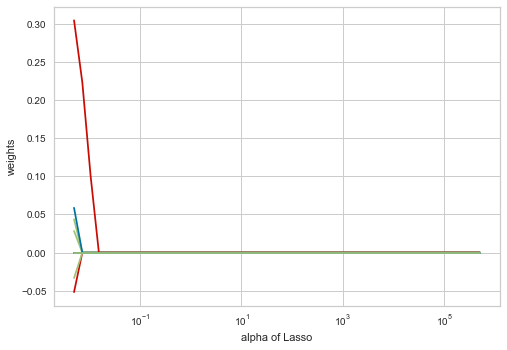

In [15]:
#Feature Selection Using Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#feature selection using Lasso
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
alphas = 10**np.linspace(6,-2,50)*0.5
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_std, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha of Lasso')
plt.ylabel('weights')

lasso = LassoCV(alphas = 10**np.linspace(6,-5,1000)*0.5)
lasso.fit(X_train_std, y_train)
lassobest=Lasso(alpha=lasso.alpha_)
lassobest
lassobest.fit(X_train_std, y_train)
best_model_coe=pd.Series(lassobest.coef_, 
index=pd.DataFrame(X,columns=df.columns[0:26]).columns)
print(best_model_coe)


Eigenvalues 
[3.69606431e+00 3.08859405e+00 2.96177752e+00 2.07679802e+00
 2.00727346e+00 1.96417509e+00 1.50358535e+00 7.91928688e-01
 1.05561594e+00 9.37337059e-01 1.00696429e+00 9.93922481e-01
 9.82974563e-01 9.68383863e-01 6.36523882e-01 4.27062503e-01
 3.03590342e-01 2.79391096e-01 2.21702697e-01 5.38490254e-02
 3.40432246e-02 1.56549421e-02 9.42326258e-03 1.66410851e-03
 3.68298817e-04 4.63649348e-04]


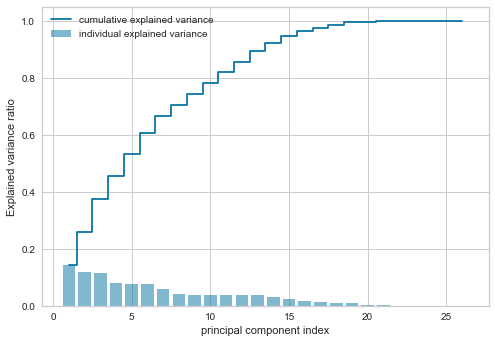

array([1.42051793e-01, 1.18704732e-01, 1.13830759e-01, 7.98181139e-02,
       7.71460587e-02, 7.54896478e-02, 5.77876835e-02, 4.05707596e-02,
       3.87009182e-02, 3.81996790e-02, 3.77789149e-02, 3.72181468e-02,
       3.60249169e-02, 3.04363995e-02, 2.44636865e-02, 1.64134033e-02,
       1.16679659e-02, 1.07379101e-02, 8.52075694e-03, 2.06959348e-03,
       1.30839203e-03, 6.01670427e-04, 3.62166681e-04, 6.39571117e-05,
       1.78195550e-05, 1.41549234e-05])

In [4]:

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scalerX = StandardScaler().fit(X_train)
X_train_std = scalerX.transform(X_train)
X_test_std = scalerX.transform(X_test)



from sklearn.decomposition import PCA
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,27), var_exp[0:26], alpha=0.5, align='center',
        label='individual explained variance')

plt.step(range(1,27), cum_var_exp[0:26], where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('principal component index')
plt.legend(loc='best')
plt.show()

pca =PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
All_components_EVR=pca.explained_variance_ratio_
All_components_EVR


# Part 3&4: Model fitting and evaluation & Hyperparameter tuning

In [55]:
# as we can see from the explained ratio plot, I think it is better to not exclude any feature
#Multiclassification

X = df.iloc[:, 0:-2].values
y = df[['Rating']].values
le = preprocessing.LabelEncoder()
le.fit(['Baa2', 'Ba3', 'Baa1', 'A2', 'Ba2', 'Caa1', 'Aa2', 'B2', 'B3', 'Aaa', 'A1', 'A3', 'Aa3', 'B1', 'Baa3', 'Ba1'] )
le.transform(df[['Rating']])
y=le.transform(df[['Rating']])
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scalerX = StandardScaler().fit(X_train)
X_train_std = scalerX.transform(X_train)
X_test_std = scalerX.transform(X_test)

#Fit the model
#logisticRegressor for multiclassification
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(C=1.0, penalty='l2',random_state=42)
lr.fit(X_train_std, y_train)
y_test_pred = lr.predict(X_test_std)
y_train_pred = lr.predict(X_train_std)
print('Logreg train accuracy: %.4f' % accuracy_score(y_train, y_train_pred))
print('Logreg test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))

#Use Cross Validation to Evaluate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=lr,
                         X=X_train_std,
                         y=y_train,
                            cv=10,
                             n_jobs=1)
print('CV train accuracy: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))
scores = cross_val_score(estimator=lr,
                         X=X_test_std,
                         y=y_test,
                            cv=10,
                             n_jobs=1)
print('CV test accuracy: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))

#Use RMSE to evaluate
RMSE_Train= np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_Test=np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE of Logreg train and test:', [RMSE_Train,RMSE_Test])     


#GridCV for Logreg to find best parameters
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=0)
param_range = [1000.0,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]
param_grid = [{'C': param_range,
    'penalty': ['l1','l2']}]
lr_cv = GridSearchCV(estimator=lr,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=1)
lr_cv = lr_cv.fit(X_train_std, y_train)
print('best train score:',lr_cv.best_score_)
print('bset parameters:',lr_cv.best_params_)

#use the best parameters to fit the test data
clf = lr_cv.best_estimator_
clf.fit(X_train_std, y_train)
print('Best_model_test accuracy: %.4f' % clf.score(X_test_std, y_test))
print('Best_model_train accuracy: %.4f' % clf.score(X_train_std, y_train))



c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2

Logreg train accuracy: 0.2625
Logreg test accuracy: 0.2000


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

CV train accuracy: 0.224 +/- 0.027
CV test accuracy: 0.182 +/- 0.076
RMSE of Logreg train and test: [6.454934273142387, 6.875788724810797]


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packag

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fi

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fi

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

best train score: 0.24191176470588233
bset parameters: {'C': 1800, 'penalty': 'l2'}
Best_model_test accuracy: 0.2235
Best_model_train accuracy: 0.2787


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=15, random_state=0)
tree.fit(X_train_std, y_train)
y_test_pred = tree.predict(X_test_std)
y_train_pred = tree.predict(X_train_std)
print('Tree train accuracy: %.4f' % accuracy_score(y_train, y_train_pred))
print('Tree test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))

#Use Cross Validation to Evaluate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=tree,
                         X=X_train_std,
                         y=y_train,
                            cv=10,
                             n_jobs=1)
print('CV train accuracy of tree: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))
scores = cross_val_score(estimator=tree,
                         X=X_test_std,
                         y=y_test,
                            cv=10,
                             n_jobs=1)
print('CV test accuracy of tree: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))

#Use RMSE to evaluate
RMSE_Train= np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_Test=np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE of tree train and test:', [RMSE_Train, RMSE_Test]) 

##GridCV for Tree to find best parameters
param_grid = [{'max_depth': [10,11,12,13,14,15,16,17,18,19,20,None],'criterion':["gini", "entropy"]}]
tree_cv = GridSearchCV(estimator=DecisionTreeClassifier(
                                random_state=0),
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=10)
tree_cv = tree_cv.fit(X_train_std, y_train)
print('best train score:',tree_cv.best_score_)
print('bset parameters:',tree_cv.best_params_)

#use the best parameters to fit the test data
clf = tree_cv.best_estimator_
clf.fit(X_train_std, y_train)
print('Best_model_test accuracy: %.4f' % clf.score(X_test_std, y_test))
print('Best_model_train accuracy: %.4f' % clf.score(X_train_std, y_train))

Tree train accuracy: 0.9890
Tree test accuracy: 0.3559


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


CV train accuracy of tree: 0.409 +/- 0.037


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


CV test accuracy of tree: 0.253 +/- 0.058
RMSE of tree train and test: [0.7840318120796765, 6.011997808304559]


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


best train score: 0.41102941176470587
bset parameters: {'criterion': 'gini', 'max_depth': None}
Best_model_test accuracy: 0.4059
Best_model_train accuracy: 1.0000


In [51]:
#SVC Model
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=20.0, random_state=1)
svm.fit(X_train_std, y_train)
y_test_pred = svm.predict(X_test_std)
y_train_pred = svm.predict(X_train_std)
print('SVC test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))
print('SVC train accuracy: %.4f' % accuracy_score(y_train, y_train_pred))

#Use Cross Validation to Evaluate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=svm,
                         X=X_train_std,
                         y=y_train,
                            cv=10,
                             n_jobs=1)
print('CV train accuracy of tree: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))
scores = cross_val_score(estimator=svm,
                         X=X_test_std,
                         y=y_test,
                            cv=10,
                             n_jobs=1)
print('CV test accuracy of tree: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))

#Use RMSE to evaluate
RMSE_Train= np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_Test=np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE of tree train and test:', [RMSE_Train, RMSE_Test]) 

#Fine-Tuning SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
pipe_svc= make_pipeline(SVC(random_state=42))
param_range = [1.0,3.0,5.0,7.0,9.0,10.0]
param_grid = [{'svc__C': param_range,
    'svc__kernel': ['linear']},
    {'svc__C': param_range,
    'svc__gamma': param_range,
    'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=1)
gs = gs.fit(X_train_std, y_train)
print('best train score:',gs.best_score_)
print('bset parameters:',gs.best_params_)

#use the best parameters to fit the test data
clf = gs.best_estimator_
clf.fit(X_train_std, y_train)
print('Best model test accuracy: %.4f' % clf.score(X_test_std, y_test))
print('Best_model_train accuracy: %.4f' % clf.score(X_train_std, y_train))

SVC test accuracy: 0.3176
SVC train accuracy: 0.4757


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


CV train accuracy of tree: 0.326 +/- 0.034
CV test accuracy of tree: 0.209 +/- 0.068
RMSE of tree train and test: [5.269431825605668, 6.131644055514753]


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


best train score: 0.42058823529411765
bset parameters: {'svc__C': 5.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}
Best model test accuracy: 0.4176
Best_model_train accuracy: 0.8581


In [67]:
##MLP neural network for multiclassification
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network.multilayer_perceptron import MLPClassifier


clf=MLPClassifier(solver='lbfgs',activation='logistic',hidden_layer_sizes=(100,100),random_state=42)
clf.fit(X_train_std,y_train)
pred=clf.predict(X_test_std)
print('Train_Accuracy:%s' % clf.score(X_train_std,y_train))
print('Test_Accuracy:%s' % clf.score(X_test_std,y_test))

Train_Accuracy:0.9345588235294118
Test_Accuracy:0.3911764705882353


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
##Keras neural network for multiclassification
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

df = pd.read_csv('C:\MLF_GP1_CreditScore.csv')

X = df.iloc[:, 0:-2].values
y = df[['Rating']].values
le = preprocessing.LabelEncoder()
le.fit(['Baa2', 'Ba3', 'Baa1', 'A2', 'Ba2', 'Caa1', 'Aa2', 'B2', 'B3', 'Aaa', 'A1', 'A3', 'Aa3', 'B1', 'Baa3', 'Ba1'] )
le.transform(df[['Rating']])
y=le.transform(df[['Rating']])
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scalerX = StandardScaler().fit(X_train)
X_train_std = scalerX.transform(X_train)
X_test_std = scalerX.transform(X_test)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
n_cols = X_train_std.shape[1]
input_shape = (n_cols,)


# Specify the model
model = Sequential()
model.add(Dense(200, activation='relu', input_shape = input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(16, activation='softmax'))

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=3)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Fit the model
model.fit(X_train_std, y_train, epochs=100, validation_split=0.2,callbacks=[early_stopping_monitor])

print('-------------------------------------------------------------------------------------------------------------------')
loss_and_metrics = model.evaluate(X_test_std, y_test, batch_size=128)

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Epoch 1/100
34/34 [==============================] - 0s 7ms/step - loss: 2.6248 - accuracy: 0.1673 - val_loss: 2.4446 - val_accuracy: 0.2132
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 2.3977 - accuracy: 0.2224 - val_loss: 2.3013 - val_accuracy: 0.2721
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.2579 - accuracy: 0.2353 - val_loss: 2.2182 - val_accuracy: 0.2426
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 2.1751 - accuracy: 0.2528 - val_loss: 2.1682 - val_accuracy: 0.2610
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0941 - accuracy: 0.2895 - val_loss: 2.0711 - val_accuracy: 0.3309
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0021 - accuracy: 0.3235 - val_loss: 2.0231 - val_accuracy: 0.3309
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9343 - accuracy: 0.3483 - val_loss: 2.0460 - val_accuracy: 0.3309
Epoch 8/100
3

# Part 5: Ensembling

In [42]:
#Ensemble
#Bagging
df = pd.read_csv('C:\MLF_GP1_CreditScore.csv')

X = df.iloc[:, 0:-2].values
y = df[['Rating']].values
le = preprocessing.LabelEncoder()
le.fit(['Baa2', 'Ba3', 'Baa1', 'A2', 'Ba2', 'Caa1', 'Aa2', 'B2', 'B3', 'Aaa', 'A1', 'A3', 'Aa3', 'B1', 'Baa3', 'Ba1'] )
le.transform(df[['Rating']])
y=le.transform(df[['Rating']])
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scalerX = StandardScaler().fit(X_train)
X_train_std = scalerX.transform(X_train)
X_test_std = scalerX.transform(X_test)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                             random_state=1,
                             max_depth=None)
bag = BaggingClassifier(base_estimator=tree,
     n_estimators=500, 
     max_samples=1.0, 
     max_features=1.0, 
    bootstrap=True, 
    bootstrap_features=False, 
    n_jobs=1, 
    random_state=1)
bag = bag.fit(X_train_std, y_train)
y_train_pred = bag.predict(X_train_std)
y_test_pred = bag.predict(X_test_std)
bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Bagging train/test accuracies 1.000/0.656


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


best train score: 0.2088235294117647
bset parameters: {'max_samples': 7, 'n_estimators': 620}
Best model test accuracy: 0.2147


In [128]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                                random_state=1,
                                 max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                        learning_rate=0.1,
                        random_state=1)
ada = ada.fit(X_train_std, y_train)
y_train_pred = ada.predict(X_train_std)
y_test_pred = ada.predict(X_test_std)
ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoost train/test accuracies 0.183/0.174


In [45]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=15, random_state=0)
tree.fit(X_train_std, y_train)
y_test_pred = tree.predict(X_test_std)
y_train_pred = tree.predict(X_train_std)
print('Tree train accuracy: %.4f' % accuracy_score(y_train, y_train_pred))
print('Tree test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))

#Use Cross Validation to Evaluate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=tree,
                         X=X_train_std,
                         y=y_train,
                            cv=10,
                             n_jobs=1)
print('CV train accuracy of tree: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))
scores = cross_val_score(estimator=tree,
                         X=X_test_std,
                         y=y_test,
                            cv=10,
                             n_jobs=1)
print('CV test accuracy of tree: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))

#Use RMSE to evaluate
RMSE_Train= np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_Test=np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE of tree train and test:', [RMSE_Train, RMSE_Test]) 

##GridCV for Tree to find best parameters
param_grid = [{'max_depth': [10,11,12,13,14,15,16,17,18,19,20],'criterion':["gini", "entropy"]}]
tree_cv = GridSearchCV(estimator=DecisionTreeClassifier(
                                random_state=0),
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=10)
tree_cv = tree_cv.fit(X_train_std, y_train)
print('best train score:',tree_cv.best_score_)
print('bset parameters:',tree_cv.best_params_)

#use the best parameters to fit the test data
clf = tree_cv.best_estimator_
clf.fit(X_train_std, y_train)
print('Best_model_test accuracy: %.4f' % clf.score(X_test_std, y_test))
print('Best_model_train accuracy: %.4f' % clf.score(X_train_std, y_train))

Tree train accuracy: 1.0000
Tree test accuracy: 0.7824
CV train accuracy of tree: 0.780 +/- 0.037
CV test accuracy of tree: 0.700 +/- 0.069
RMSE of tree train and test: [0.0, 0.4665265896211377]
best train score: 0.8007352941176471
bset parameters: {'criterion': 'gini', 'max_depth': 11}
Best_model_test accuracy: 0.7971
Best_model_train accuracy: 0.9728


In [10]:
#Part 2 Binary classification
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression 
df = pd.read_csv('C:\MLF_GP1_CreditScore.csv')

X = df.iloc[:, 0:-2].values
y = df[['InvGrd']].values.ravel()
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scalerX = StandardScaler().fit(X_train)
X_train_std = scalerX.transform(X_train)
X_test_std = scalerX.transform(X_test)

#logisticRegressor
lr = LogisticRegression(C=1.0, penalty='l2',random_state=0,max_iter=1000)
lr.fit(X_train_std, y_train)
y_test_pred = lr.predict(X_test_std)
y_train_pred = lr.predict(X_train_std)
print('Logreg train accuracy: %.4f' % accuracy_score(y_train, y_train_pred))
print('Logreg test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))

#Use Cross Validation to Evaluate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=lr,
                         X=X_train_std,
                         y=y_train,
                            cv=10,
                             n_jobs=1)
print('CV train accuracy: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))
scores = cross_val_score(estimator=lr,
                         X=X_test_std,
                         y=y_test,
                            cv=10,
                             n_jobs=1)
print('CV test accuracy: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))

#Use RMSE to evaluate
RMSE_Train= np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_Test=np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE of Logreg train and test:', [RMSE_Train,RMSE_Test])     


#GridCV for Logreg to find best parameters
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=0,max_iter=10000)
param_range = [0.0001, 0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,
    'penalty': ['l2']}]
lr_cv = GridSearchCV(estimator=lr,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=1)
lr_cv = lr_cv.fit(X_train_std, y_train)
print('best train score:',lr_cv.best_score_)
print('bset parameters:',lr_cv.best_params_)

#use the best parameters to fit the test data
clf = lr_cv.best_estimator_
clf.fit(X_train_std, y_train)
print('Best_model_test accuracy: %.4f' % clf.score(X_test_std, y_test))
print('Best_model_train accuracy: %.4f' % clf.score(X_train_std, y_train))

Logreg train accuracy: 0.7721
Logreg test accuracy: 0.7618
CV train accuracy: 0.760 +/- 0.017
CV test accuracy: 0.747 +/- 0.020
RMSE of Logreg train and test: [0.4774318553161155, 0.48809353009197637]
best train score: 0.7625
bset parameters: {'C': 0.01, 'penalty': 'l2'}
Best_model_test accuracy: 0.7618
Best_model_train accuracy: 0.7669


In [5]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train.ravel())
y_test_pred = knn.predict(X_test_std)
y_train_pred = knn.predict(X_train_std)
print('KNN train accuracy: %.4f' % accuracy_score(y_train.ravel(), y_train_pred.ravel()))
print('KNN test accuracy: %.4f' % accuracy_score(y_test.ravel(), y_test_pred.ravel()))


#Use Cross Validation to Evaluate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn,
                         X=X_train_std,
                         y=y_train.ravel(),
                            cv=10,
                             n_jobs=1)
print('CV train accuracy of knn: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))
scores = cross_val_score(estimator=knn,
                         X=X_test_std,
                         y=y_test.ravel(),
                            cv=10,
                             n_jobs=1)
print('CV test accuracy of knn: %.3f +/- %.3f' % (np.mean(scores),
 np.std(scores)))

#Use RMSE to evaluate
RMSE_Train= np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_Test=np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE of knn train and test:', [RMSE_Train, RMSE_Test]) 


##GridCV for KNN to find best parameters
param_grid = [
    {'weights':['uniform'],
     'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
    },
    {
     'weights':['distance'],
     'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
     'p':[1,2,3,4,5,6,7,8,9,10]
    }
]
knn_cv = GridSearchCV(estimator=KNeighborsClassifier(),
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=10)
knn_cv = knn_cv.fit(X_train_std, y_train)
print('best train score:',knn_cv.best_score_)
print('bset parameters:',knn_cv.best_params_)

#use the best parameters to fit the test data
clf = knn_cv.best_estimator_
clf.fit(X_train_std, y_train)
print('Best_model_test accuracy: %.4f' % clf.score(X_test_std, y_test))
print('Best_model_train accuracy: %.4f' % clf.score(X_train_std, y_train))

KNN train accuracy: 0.9000
KNN test accuracy: 0.8059
CV train accuracy of knn: 0.806 +/- 0.035
CV test accuracy of knn: 0.738 +/- 0.028
RMSE of knn train and test: [0.31622776601683794, 0.440587842613506]
best train score: 0.8522058823529411
bset parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best_model_test accuracy: 0.8471
Best_model_train accuracy: 1.0000


In [47]:
# Neural Network for binary
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network.multilayer_perceptron import MLPClassifier


clf=MLPClassifier(solver='lbfgs',activation='logistic',hidden_layer_sizes=(100,100),random_state=42)
clf.fit(X_train_std,y_train)
pred=clf.predict(X_test_std)
print('Train_Accuracy:%s' % clf.score(X_train_std,y_train))
print('Test_Accuracy:%s' % clf.score(X_test_std,y_test))

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train_Accuracy:0.9154411764705882
Test_Accuracy:0.7823529411764706


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [48]:
##Keras neural network for binary
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

df = pd.read_csv('C:\MLF_GP1_CreditScore.csv')

X = df.iloc[:, 0:-2].values
y = df[['InvGrd']].values
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scalerX = StandardScaler().fit(X_train)
X_train_std = scalerX.transform(X_train)
X_test_std = scalerX.transform(X_test)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
n_cols = X_train_std.shape[1]
input_shape = (n_cols,)


# Specify the model
model = Sequential()
model.add(Dense(200, activation='relu', input_shape = input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=3)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Fit the model
model.fit(X_train_std, y_train, epochs=50, validation_split=0.2,callbacks=[early_stopping_monitor])

print('-------------------------------------------------------------------------------------------------------------------')
loss_and_metrics = model.evaluate(X_test_std, y_test, batch_size=128)

Epoch 1/50
34/34 [==============================] - 0s 5ms/step - loss: 0.6223 - accuracy: 0.7528 - val_loss: 0.5304 - val_accuracy: 0.7721
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7739 - val_loss: 0.4736 - val_accuracy: 0.7941
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7812 - val_loss: 0.4301 - val_accuracy: 0.8235
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7923 - val_loss: 0.4183 - val_accuracy: 0.8125
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8024 - val_loss: 0.4134 - val_accuracy: 0.8125
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8162 - val_loss: 0.3881 - val_accuracy: 0.8235
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8153 - val_loss: 0.3792 - val_accuracy: 0.8235
Epoch 8/50
34/34 [==

In [52]:
#Ensemble 

df = pd.read_csv('C:\MLF_GP1_CreditScore.csv')

X = df.iloc[:, 0:-2].values
y = df[['InvGrd']].values
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scalerX = StandardScaler().fit(X_train)
X_train_std = scalerX.transform(X_train)
X_test_std = scalerX.transform(X_test)

#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                             random_state=1,
                             max_depth=None)
bag = BaggingClassifier(base_estimator=tree,
     n_estimators=500, 
     max_samples=1.0, 
     max_features=1.0, 
    bootstrap=True, 
    bootstrap_features=False, 
    n_jobs=1, 
    random_state=1)
bag = bag.fit(X_train_std, y_train)
y_train_pred = bag.predict(X_train_std)
y_test_pred = bag.predict(X_test_std)
bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))


c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Bagging train/test accuracies 1.000/0.891


In [53]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                                random_state=1,
                                 max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                        learning_rate=0.1,
                        random_state=1)
ada = ada.fit(X_train_std, y_train)
y_train_pred = ada.predict(X_train_std)
y_test_pred = ada.predict(X_test_std)
ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

c:\users\倪文卿\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoost train/test accuracies 0.851/0.791
